In [1]:
#Initialization
%matplotlib inline
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
#Mathematical constants
pi = np.pi
tpi = 2.0*pi
fpi = 4.0*pi
zI = 1.0j
#Physical constants
#https://ja.wikipedia.org/wiki/%E5%8E%9F%E5%AD%90%E5%8D%98%E4%BD%8D%E7%B3%BB
aB = 0.0529177210903 #nanometer
Hartree = 27.211386245988 #eV
Atomtime = 0.024188843265857 #fs
Atomfield = Hartree/aB #V/nm
#https://ja.wikipedia.org/wiki/%E5%BE%AE%E7%B4%B0%E6%A7%8B%E9%80%A0%E5%AE%9A%E6%95%B0
sol = 137.035999084 #speed of light
ch = 1241.5 #eV * nm
chbar = 197.3 # eV * nm
halfepsc = 3.509e16 # W/cm^2 \frac{1}{2}*\epsilon_0 * c
Atomfluence = halfepsc*Atomtime*1.0e-15 # J/cm^2 ,W/cm^2 * fs = femto J/cm^2

$$\epsilon = 1 + \chi$$

In [2]:
#System parameters
chi1 = 4
chi2 = 1.0e1
chi3 = 1.0e1
chi4 = 1.0e1
chi5 = 1.0e1
chi6 = 1.0e1

In [6]:
#Set up
NT = 10000
dt = 0.5
tt = np.arange(0,NT*dt,dt,dtype='float64')
At = np.zeros(NT,dtype='float64')
Et = np.zeros(NT,dtype='float64')
E0 = 4.0/Atomfield      #1.0 V/nm
Tpulse = 100.0/Atomtime #100 fs
omegac = 1.55/Hartree   #1.55 eV
CEP = 0.75*tpi          #
nenvelope = 4
if (tt[NT-1] < Tpulse):
    print('Tpulse'+str(Tpulse)+'is too short for this simulation.')
for it in range(NT):
    if (tt[it] < Tpulse):
        At[it] = (E0/omegac)*(np.sin(pi*tt[it]/Tpulse))**nenvelope*np.cos(omegac*(tt[it]-0.5*Tpulse)+CEP)
for it in range(1,NT-1):
    Et[it] = (At[it+1] - At[it-1])/(2.0*dt)
Et[0] = 2.0*Et[1] - Et[2]
Et[NT-1] = 2.0*Et[NT-2] - Et[NT-3]

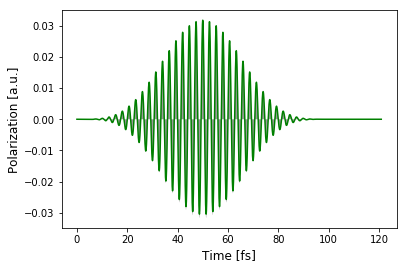

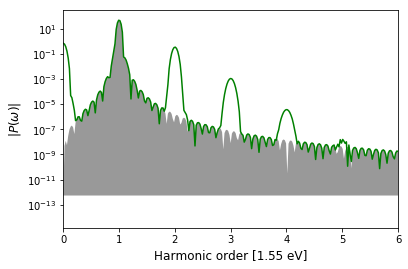

In [7]:
Pt = chi1*Et + chi2*Et**2 + chi3*Et**3 + chi4*Et**4 + chi5*Et**5 + chi6*Et**6
plt.figure()
plt.xlabel('Time [fs]',fontsize = 12)
plt.ylabel('Polarization [a.u.]',fontsize = 12)
plt.fill(tt*Atomtime,Et*np.amax(Pt)/np.amax(Et),'k',alpha=0.4)
plt.plot(tt*Atomtime,Pt,'g')
plt.show()
#
omega = np.fft.fftfreq(NT)*(tpi/dt)
PF = np.fft.fft(Pt)
EF = np.fft.fft(Et)
plt.figure()
plt.xlim(0.0,6.0)
plt.xlabel('Harmonic order ['+str(omegac*Hartree)+' eV]',fontsize = 12)
plt.ylabel('$|P(\omega)|$',fontsize = 12)
plt.yscale('log')
plt.fill(omega[:NT//2]/omegac,np.abs(EF[:NT//2])*np.amax(np.abs(PF[:NT//2]))/np.amax(np.abs(EF[:NT//2])),'k',alpha=0.4)
#plt.fill(omega[:NT//2]/omegac,np.abs(EF[:NT//2]),'k',alpha=0.4)
plt.plot(omega[:NT//2]/omegac,np.abs(PF[:NT//2]),'g')
plt.show()